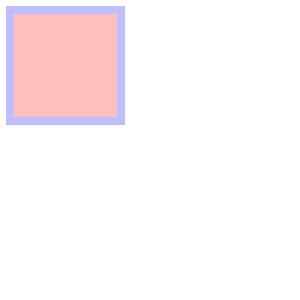

In [1]:
#! /usr/bin/env python
# converting cairo_push_group () example code to python

''' provided from http://www.cairographics.org/manual/cairo-cairo-t.html#cairo-push-group:
"
This group functionality can be convenient for performing intermediate compositing.
One common use of a group is to render objects as opaque within the group,
(so that they occlude each other), and then blend the result with translucence onto the destination.
...
As an example, here is how one might fill and stroke a path with translucence,
but without any portion of the fill being visible under the stroke:"
------------------------------------
cairo_push_group (cr);
cairo_set_source (cr, fill_pattern);
cairo_fill_preserve (cr);
cairo_set_source (cr, stroke_pattern);
cairo_stroke (cr);
cairo_pop_group_to_source (cr);
cairo_paint_with_alpha (cr, alpha);
------------------------------------

As clarification, I think they mean "but without any portion of the fill being
differentially visible under the stroke" because you can imagine if you
designated the stroke translucent at the time it was made, it would look
different in the regions where it was over the fill as opposed to the portions
where it was not, i.e. the translucent stroke would be darker or lighter
depending on what was underneath.

'''


'''
Other components
----------------
#from http://www.tortall.net/mu/wiki/CairoTutorial

cr.set_line_width(0.1)
cr.set_source_rgb(0, 0, 0)
cr.rectangle(0.25, 0.25, 0.5, 0.5)
cr.stroke()


cr.set_source_rgb(0, 0, 0)
cr.rectangle(0.25, 0.25, 0.5, 0.5)
cr.fill()

'''



import cairocffi as cairo

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 300, 300)
cr = cairo.Context(surface)

cr.push_group()
cr.set_source_rgb(1, 0, 0)
cr.rectangle(10, 10, 111, 111)
cr.fill_preserve()
cr.set_line_width(8.1)
cr.set_source_rgb(0, 0, 1)
cr.rectangle(10, 10, 111, 111)
cr.stroke()
cr.pop_group_to_source()
cr.paint_with_alpha(0.25) # this is when the semi-transparency gets applied


surface.write_to_png('push_group_example.png')

# Use IPython.display Image function to show the resulting image
from IPython.display import Image
Image('push_group_example.png')